In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
def data_generator():
    while 1:
        f = open('data_new/CIKM2017_train/train.txt')
        x = []
        y = []
        num = 0
        for line in f:
            linebits = line.split(',') #__, label y, matrix x
            y.append(float(linebits[1]))
            xstrlist = linebits[2].split(' ')
            xlist = [int(xstrlist[i]) for i in range(len(xstrlist))]
            x.append(xlist[:])
            num += 1
            if num == 100:
                x = np.array(x).reshape((100, 15, 4, 101, 101))
                y = np.array(y)
                yield x, y
                x = []
                y = []
                num = 0
        f.close()

In [3]:
gen = data_generator()

In [16]:
x, y = next(gen)

In [8]:
x.shape

(100, 15, 4, 101, 101)

In [24]:
y

array([ 16. ,   2.1,   4. ,   3.3,   2.3,   4.3,   1.1,   1.4,   1.3,
         6.5,   6. ,   5.6,   3.7,  20. ,   2.7,  12.7,   1.6,   3.2,
         1.2,   2.5,   3.2,   1.4,   0. ,   0. ,   2.1,   4.7,  10.7,
         1.7,   3.8,   5.8,   1.6,   5.6,   3. ,   2.2,   1.3,   5.9,
         4.3,   0.2,   2. ,  14.8,   2. ,   3.5,   6.5,   1.4,   1.5,
         7.2,   2.7,   6.5,   8.5,   7.3,   0. ,   6. ,  11.3,  10.7,
         4.9,   5.3,   6. ,   2.6,   1.5,   1. ,   2.1,   1.5,   6.1,
         2.8,   2.3,   4.1,   2.9,   2.7,   1.5,   1. ,   1.2,   2.5,
         1. ,   3.7,   4.1,   2. ,   6.2,   1.2,   3.9,   1.7,   1.8,
         1.7,   4. ,   6.3,   4.2,   4.9,  13.6,   3.3,  30. ,  21.6,
        21.7,  22.6,  21.7,  21. ,  20.7,  25.2,  22.3,  20.5,  21.5,  22.3])

In [25]:
np.argmax(y)

88

# Plot the radar image

In [14]:
def plot_(x, y):
    plt.figure(figsize=(20, 80))
    for t in range(15):
        for h in range(4):
            imarray = np.asfarray(x[t, h, :, :])
            plt.subplot(15,4,t*4+h+1)
            plt.subplots_adjust(hspace=0.5)
            plt.tight_layout()
            plt.title(" Time" + str(t) + " Hight" + str(h) + " y=" + str(y))
            plt.imshow(imarray, cmap='Greys', interpolation='None')

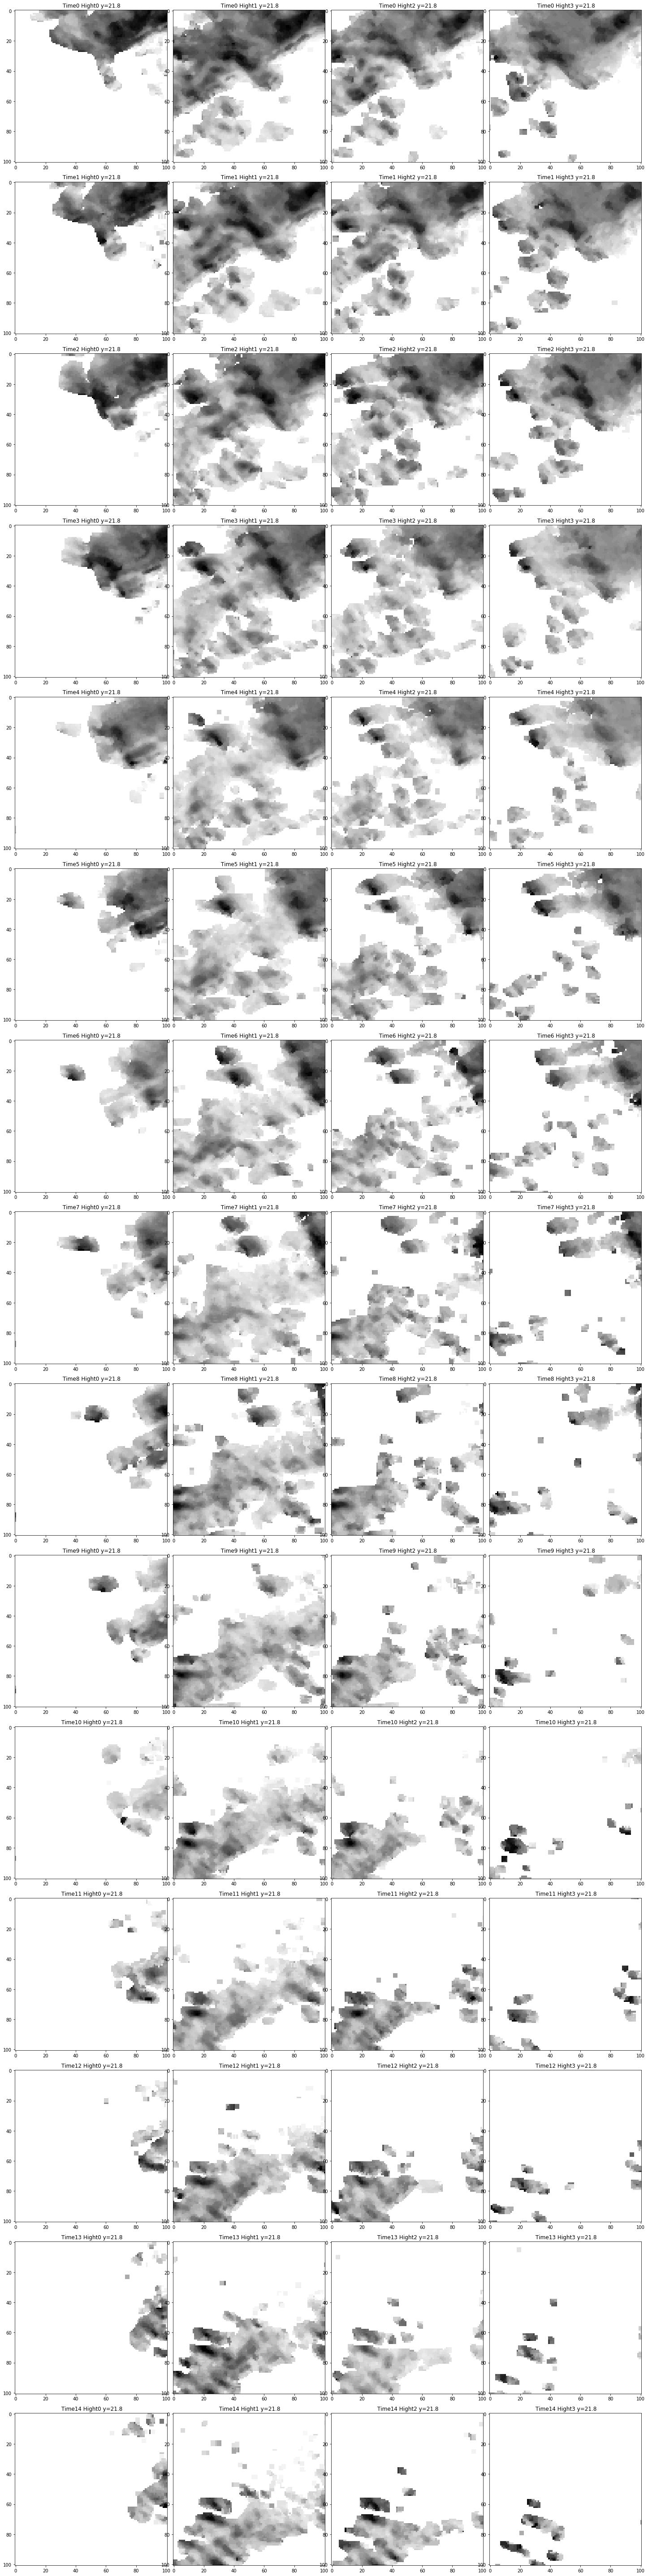

In [15]:
plot_(x[90], y[90])

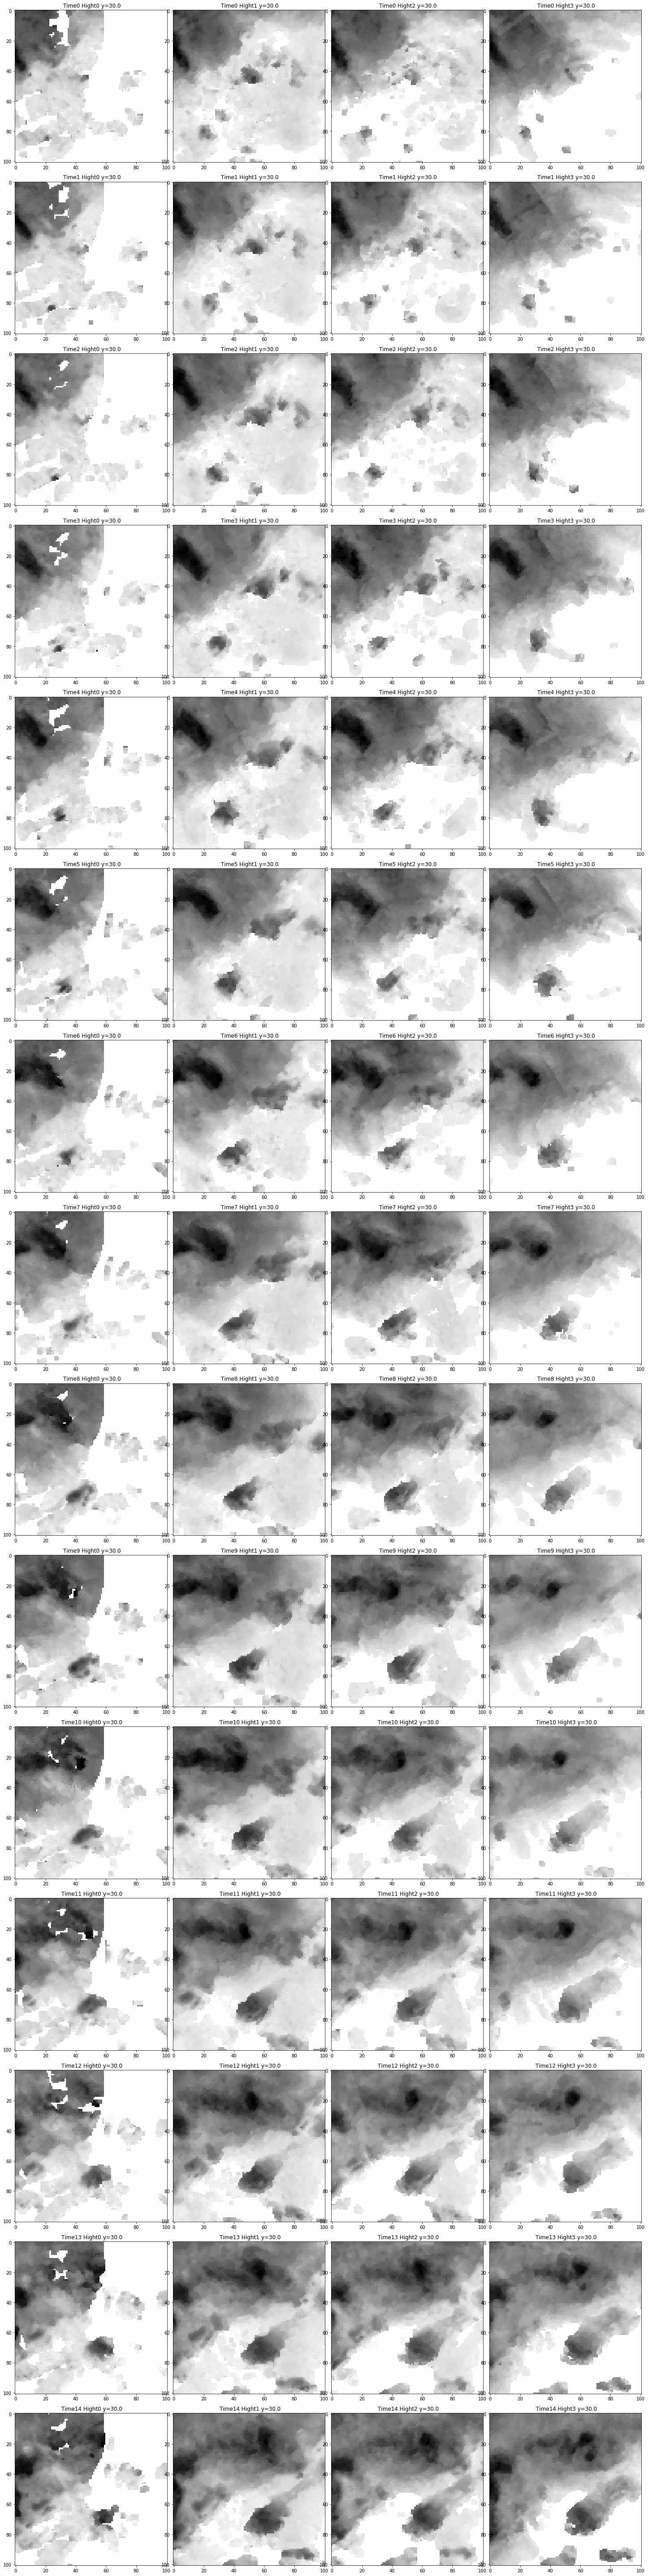

In [26]:
plot_(x[88], y[88])

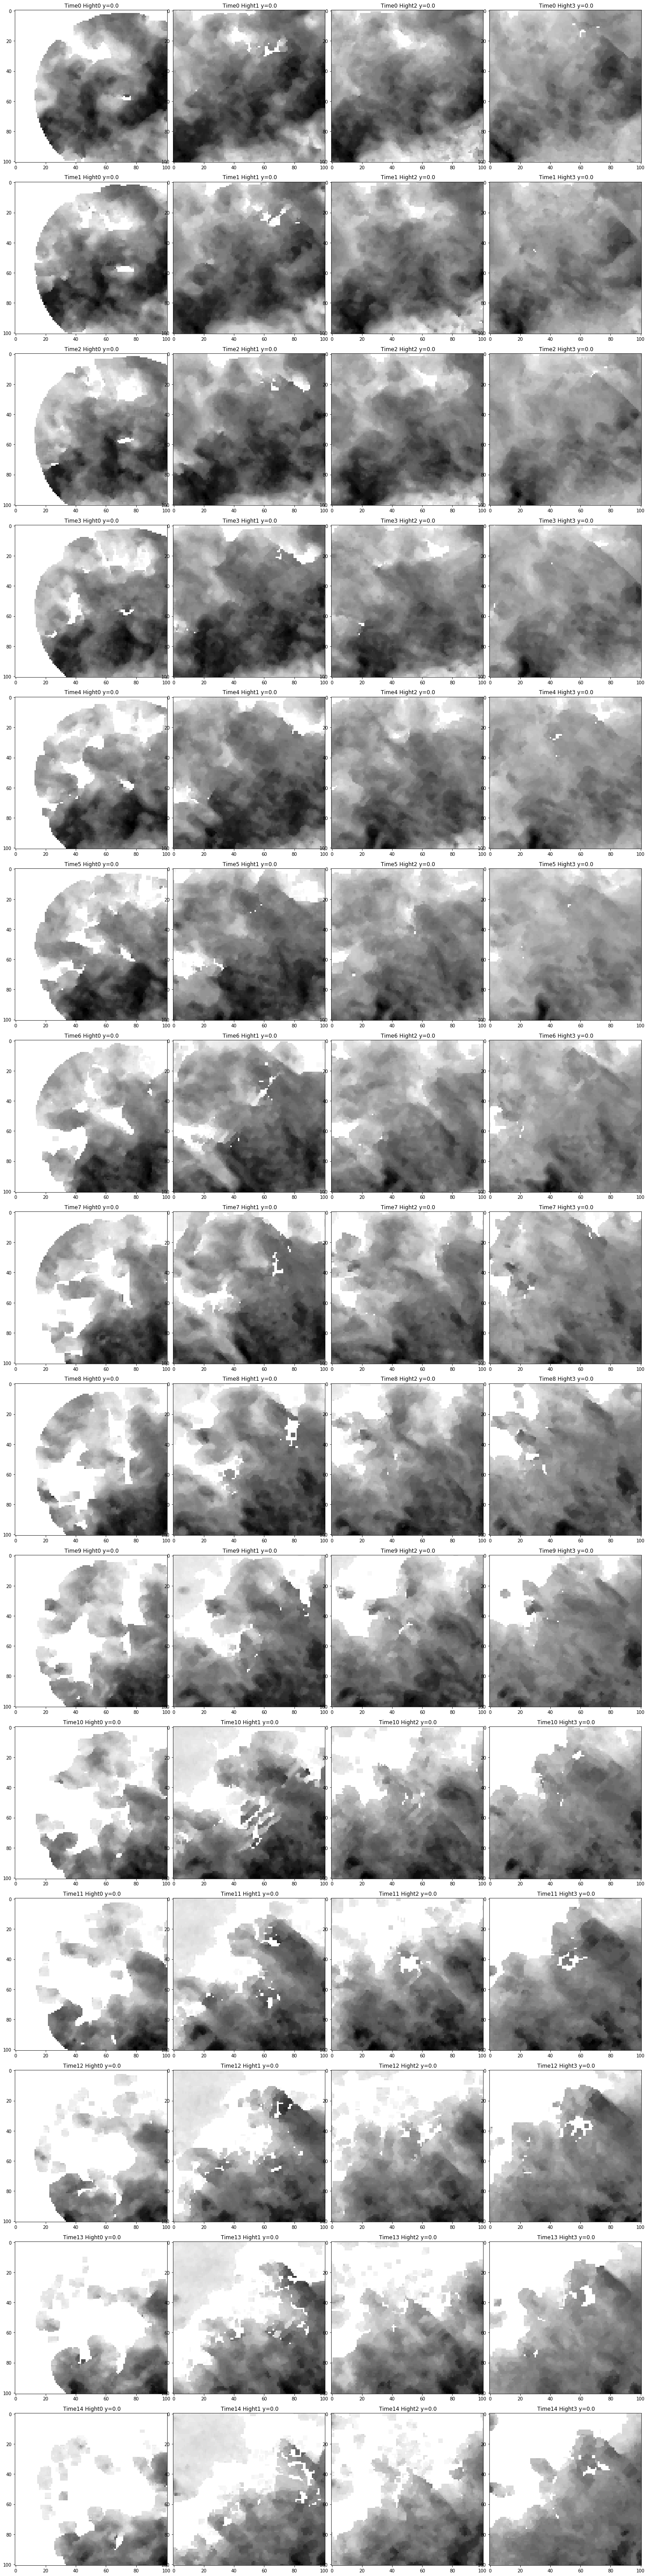

In [27]:
plot_(x[22], y[22])

# Plot the label data (precipitation)

In [17]:
y_all = []
with open("data_new/CIKM2017_train/train_y.txt", 'r') as f:
    for line in f:
        y_all.append(float(line))
train_y = np.array(y_all)

In [18]:
train_y_s = pd.Series(train_y)

In [19]:
train_y_s.describe()

count    10000.000000
mean        15.545400
std         15.855781
min          0.000000
25%          2.400000
50%          8.000000
75%         25.700000
max        138.400000
dtype: float64

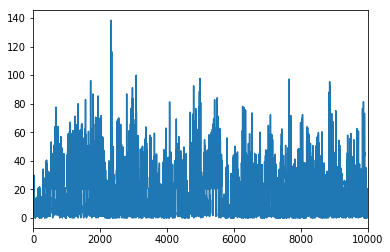

In [20]:
train_y_s.plot()

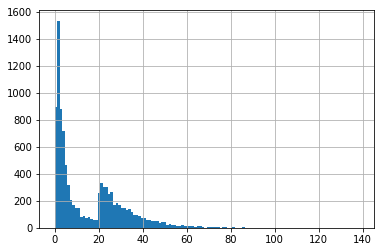

In [21]:
train_y_s.hist(bins=120)

In [22]:
np.unique(train_y.astype(int))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  91,  92,  95,
        96,  97,  99, 116, 138])

In [23]:
train_y_s[train_y_s > 100]

2322    138.4
2345    116.4
dtype: float64